
# MLP vs LSTM Neural networks for Athens stock exchange index forecast. 
Spyridon G. Vergos | An interactive notebook based on my Thesis for Msc in Banking and Finance 


### Abstract 
The fields of big data analysis and deep learning are developing fast recently mainly due to the vast availability of data sets online and the unpreceded cheap computational power of cloud services. LSTM Neural Networks is a specialized function approximator for time-series problems. It involves memory neurons that can overcome the training problems faced by classical Recurrent Neural Networks with very deep architectures. In this Thesis, we use an LSTM Neural Network to test the Efficient Market Hypothesis introduced by Eugene Fama by attempting to forecast the movement of the Greek Index Future FTSE/ATHEX Large Cap. Additionally, we compare the performance of our LSTM model performance with a Multilayered Perceptron using as variables autoregressive terms of our dataset. We conclude that the performed accuracy is impressive nevertheless it might be attributed to the good fitting of the model in the out of sample data and lack of exposure to LSTM of the particular market. Finally, we suggest ideas for further research.

 
### Introduction 
 The limitations of the single-layered neural network demonstrated
were decisive for the dereliction in Neural Network research during
the 1970s. The discovery of the Multilayered Neural Network
trained by backpropagation of errors emerged as a tool for
solving a variety of problems (Rumelhart, et al. 1986).
As illustrated in figure 4. a Multi-Layer Perceptron has a minimum
of three layers of nodes (neurons):
The input layer (X), the
“hidden” layer (Z) and the output layer (y). Observing formula (8) we 
can
remark
that
it
practically
equals
the
Universal
Approximation Theorem formula (4) in section 3.1 as long as the
activation function stays linear (Haykin, 1998). What is important to
notice is that the output of the first layer is again multiplied by a
second weight matrix and fed to a new layer of nodes.
Considering that the outputs of the layers are non-linear we can
imagine the level of complexity built over time.


(4)![Screenshot%20from166%202018-10-18%2023-53-26.png](graphs/Screenshot%20from166%202018-10-18%2023-53-26.png)

![Screenshot120%20from%202018-10-18%2020-47-54.png](graphs/Screenshot120%20from%202018-10-18%2020-47-54.png)

![Screenshot132%20from%202018-10-18%2020-49-02.png](graphs/Screenshot132%20from%202018-10-18%2020-49-02.png)

Hochreiter and Schimidhuber (1997) introduced the LSTM (long
short-term memory) network as a special Recurrent Neural
network type which can capture autoregressive structures of
arbitrary length. Contrary to a regular RNN the LSTM doesn’t need
a predetermined number of “feedback loops”.

The Long Short-Term Memory Neural Networks have been used to
model
functions
for
language
translation
applications
(Sundermeyer et al., 2012), music recognition software (Eck and
Schmidhuber, 2002), speech recognition programs (Graves et al.,
2013) and facial motion capture (Wollmer et al., 2012).
Research results for the past three years revealed that LSTM
Networks show significant Improvements compared to state of the
art deep traditional multilayered perceptrons (Graves et al., 2013).
Hinton et al. (2012) mention that despite the broad recent use of
neural networks few academic papers are using LSTMS in their
methodology. The graphical representation of an LSTM is complex. Contrary to the Multilayer Perceptron the lines weights and gates are scattered in a way that is visually inconvenient to understand.
Figure 6 is a clean example found in the bibliography. The main
advantages of the LSTM can be summarized as:

•
They overcome the RNN limitations of vanishing and exploding
gradients.

•
Use memory in a way that handles the issue of long-term
dependency of input sequences.

•
Allow processing input and output sequences each time step
at a time, allowing different length inputs and outputs.

(6)![Screenshot188%20from%202018-10-19%2000-00-08.png](graphs/Screenshot188%20from%202018-10-19%2000-00-08.png)



LSTM networks use LSTM blocks as neurons similar to the system in
formula (23) in contrast with feedforward neural networks. The
LSTM blocks are comparable to a differentiable computer’s
memory chip. Every one of them consists of a group of recurrently
connected memory cells and three multiplicative units. An input,
an output and a forget gate that are the read, write and reset
operators for the cells. The gates are the interaction mediums
between the cells and the network (Graves and Schmidhuber
2005).

![Screenshot3%20from%202018-10-16%2019-33-33.png](graphs/Screenshot3%20from%202018-10-16%2019-33-33.png)

Formula (23) describes the LSTM block with its recurrent attributes.For example,h t−1 is the output vector for t −1 and is included in the calculation of h t . The ft gate of the LSTM block is the forget gate which controls the information that is to be forgotten by the cell state, c t . The sigmoid function effectively wraps the linear expression and maps it between values 0 and 1. Whenever f t is set to 0 by the optimizer the value is “forgotten in the calculation. The latest information stored into the cell state is controlled by gate i t and the output comes from gate ot. Then the cell state and the output gate are merged in
output vector h t

Since we will be using a sophisticated LSTM model for evaluating our hypothesis we will use a wider topology within each layer. Its architecture will be consisted of three hidden layers of neurons. 
The first hidden layer will include 4 neurons, the second 50 and the third 100. 
The last two layers are going to be optimized by a dropout regularization layer which will drop half of the neurons in each epoch.The learning algorithm of choice for our artificial neural networks is the adaptive moment estimation (ADAM) method. The model is saved in h5 format and the data is the Athens stock exchange ATHEX index dayly returns from 22 January 2001 to 20 october 2017.The output layer is going to be wrapped by a SoftMax function as in formula (27).

![Screenshot%20from%202018-10-16%2018-09-35.png](graphs/Screenshot%20from%202018-10-16%2018-09-35.png)

## List of Hyperparameters for the LSTM Neural Network

 Learning algorithm Adaptive Moment Estimation: (ADAM)

 Loss Function Mean Average: Error

 Learning rate: 0.001

 Momentum: 0.003

 Batch size: 1

 Epochs: 200

 Initialization of weights: N (0.1)

 Input Neurons: 1

 Hidden Layers: 3

 Hidden Neurons: 4, 50, 100

 Output Neurons: 1 

### Explanatory variables............................lag

1. FTSE/ATHEX Large Cap returns............................1

2. FTSE/ATHEX Large Cap returnns..........................2

3. FTSE/ATHEX Large Cap returns............................3

## The Dataset


 #### Athens Stock Exchange FTSE/ATHEX Large Cap index returns from 22 January 2001 20 October 2017
  
Total dataset.......... 4152 

Training dataset..... 2782 

Test dataset 685....... 13         



### The Python code below accepts and processes the timeseries dataset. Then it accepts the .h5 model files where the neural network weights and topology are saved and makes predictions using the data.

In [1]:
from keras.models import load_model
import numpy

import matplotlib.pyplot as plt
from pandas import read_csv
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)

 
dataframe = read_csv('./DATASETS/2001-2017-ATHEX-RETURNS.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

look_back2 = 3
trainX2, trainY2 = create_dataset(train, look_back2)
testX2, testY2 = create_dataset(test, look_back2)

trainX2 = numpy.reshape(trainX2, (trainX2.shape[0], trainX2.shape[1], 1))
testX2 = numpy.reshape(testX2, (testX2.shape[0], testX2.shape[1], 1))

batch_size = 1 

model = load_model('./MODELS/MLP2.h5')

model2 = load_model('./MODELS/LSTM.h5')

trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict2 = model2.predict(trainX2, batch_size=batch_size)
model2.reset_states()
testPredict2 = model2.predict(testX2, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainPredict2 = scaler.inverse_transform(trainPredict2)
trainY2 = scaler.inverse_transform([trainY2])
testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY2])


Using TensorFlow backend.
/home/spiros/.local/lib/python3.6/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


As suggested by Twomey’s and Smith’s (1995) paper we use the Mean Absolute Error (MAE) as presented in formula table (26) to evaluate the predictive accuracy of our models. Along with that, we calculate The Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE).All these measures interpret the deviation of the forecasted value to the actual value as a positive number.



(26)![Error%20formulas.png](graphs/Error%20formulas.png) (Twomey and Smith, 1995)

In [2]:

trainScore = (mean_absolute_error(trainY[0], trainPredict[:,0]))
testScore = (mean_absolute_error(testY[0], testPredict[:,0]))
print('*The MLP MAE Train Score: %.2f.............'% (trainScore),'The MLP MAE Test Score: %.2f \n'% (testScore))


trainScore2 = (mean_absolute_error(trainY2[0], trainPredict2[:,0]))
testScore2 =(mean_absolute_error(testY2[0], testPredict2[:,0])) 
print('*The LSTM MAE Train Score: %.2f............'% (trainScore2),'The LSTM MAE Test Score: %.2f \n\n'% (testScore2))


trainScore = (mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = (mean_squared_error(testY[0], testPredict[:,0]))
print('*The MLP MSE Train Score: %.2f.............'% (trainScore),'The MLP MSE Test Score: %.2f \n'% (testScore))


trainScore2 = (mean_squared_error(trainY2[0], trainPredict2[:,0]))
testScore2 =(mean_squared_error(testY2[0], testPredict2[:,0])) 
print('*The LSTM MSE Train Score: %.2f............'% (trainScore2),'The LSTM MSE Test Score: %.2f \n\n'% (testScore2))


trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('*The MLP RMSE Train Score: %.2f............'% (trainScore),'The MLP RMSE  Test Score: %.2f \n'% (testScore))


trainScore2 = math.sqrt(mean_squared_error(trainY2[0], trainPredict2[:,0]))
testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0])) 
print('*The LSTM RMSE Train Score: %.2f...........'% (trainScore2),'The LSTM RMSE Test Score: %.2f \n\n'% (testScore2))





*The MLP MAE Train Score: 0.01............. The MLP MAE Test Score: 0.02 

*The LSTM MAE Train Score: 0.01............ The LSTM MAE Test Score: 0.02 


*The MLP MSE Train Score: 0.00............. The MLP MSE Test Score: 0.00 

*The LSTM MSE Train Score: 0.00............ The LSTM MSE Test Score: 0.00 


*The MLP RMSE Train Score: 0.02............ The MLP RMSE  Test Score: 0.03 

*The LSTM RMSE Train Score: 0.02........... The LSTM RMSE Test Score: 0.03 




Contrary to Mean Absolute Error that weights equally all deviations to
give the absolute mean, the Mean Squared Error and Root Mean Squared
error are squaring the errors. As a result, they weight heavier the highly
erroneous observations (Twomey and Smith, 1995). This makes the latter a
good evaluation tool for models that instantaneous volatility matters the
most.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Multi-Layered Perceptron Neural-Network.


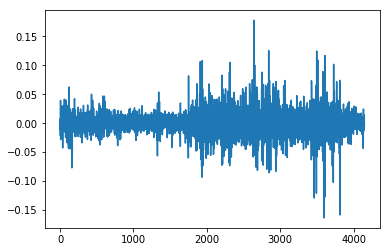

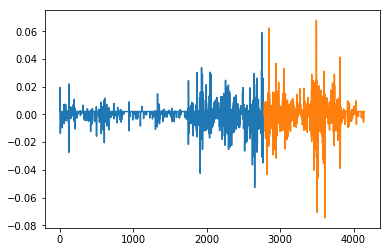

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
LSTM Neural Network


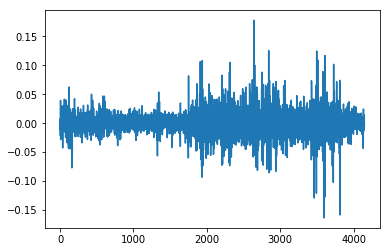

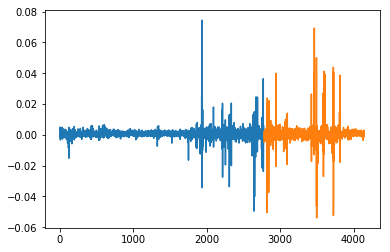

In [3]:

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
print ('-' * 80)
print ('-' * 80)
print("Multi-Layered Perceptron Neural-Network.")

plt.plot(scaler.inverse_transform(dataset))
plt.show()
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


print ('-' * 80)
print ('-' * 80)


trainPredictPlot2 = numpy.empty_like(dataset)
trainPredictPlot2[:, :] = numpy.nan
trainPredictPlot2[look_back2:len(trainPredict2)+look_back2, :] = trainPredict2


testPredictPlot2 = numpy.empty_like(dataset)
testPredictPlot2[:, :] = numpy.nan
testPredictPlot2[len(trainPredict2)+(look_back2*2)+1:len(dataset)-1, :] = testPredict2

print("LSTM Neural Network") 


plt.plot(scaler.inverse_transform(dataset))
plt.show()
plt.plot(trainPredictPlot2)
plt.plot(testPredictPlot2)
plt.show()







The first graph shows the predictions of the MLP model on the training (orange) and the testing (green) part of our sample. Comparing the MLP graph to traditional static econometic models we can see that the neural network captures more efficiently the volatility across the dataset. Especially in the last clusters of the testing sample, the performance is impressive. 

The Multilayered perceptron has several limitations when it comes to time series prediction mainly due to the static nature of its dependencies. Nevertheless, Multilayered perceptron’s can perform equal or better in situations that small time windows are used, and all the data involved is fed to the input layer at once. In situations like that the simplicity of the MLP neuron compared to the LSTM’s can save us computational time and memory. 

The second graph shows the predictions of the Long Short-Term Memory network. Like the Multilayered Perceptron above the model profoundly detects the volatility clusters on the dataset making it a very promising forecasting tool for volatility-based trading strategies.

We can also observe how the LSTM captures more effectively the
magnitude of the volatility clusters.The LSTM handles better the dependencies between time steps due to the way its nodes treat and store memory over time thus it can approximate the functional form in a dynamic way compared to the static Multilayered perceptron.

## Use the models with new data.

In [4]:

Xnew = numpy.array([[-0.029466096, -0.030317302,0.030317302,0.10317302,-0.030317302]])

ynew = model.predict(Xnew)

print("Xnew=%s, Predicted=%s" % (Xnew[0], ynew[0]))
print('-'*90)
if ynew>0:
   print("Place a Buy Order")
if ynew<0:
     print("Place a Sell Order")


Xnew=[-0.0294661  -0.0303173   0.0303173   0.10317302 -0.0303173 ], Predicted=[-0.02255099]
------------------------------------------------------------------------------------------
Place a Sell Order


In [5]:

Xnew2 = numpy.array([[0.029466096, 0.10317302,-0.50317302]])


Xnew2 = numpy.reshape(Xnew2, (Xnew2.shape[0], Xnew2.shape[1], 1))

ynew2 = model2.predict(Xnew2)

print("Xnew2=%s, Predicted=%s" % (Xnew2[0], ynew2[0]))
print('-'* 50)

if ynew2>0:
   print("Place a Buy Order")
if ynew2<0:
     print("Place a Sell Order")
  

Xnew2=[[ 0.0294661 ]
 [ 0.10317302]
 [-0.50317302]], Predicted=[-0.08046673]
--------------------------------------------------
Place a Sell Order


### References

[1].Eck and J. Schmidhuber (2002) Learning the long-term structure
of the blues. In Proc. of ICANN, 284-289.

[2].Graves, A. and Mohamed, A. and Hinton, G. (2013) Speech
recognition with deep recurrent neural networks. In Proc. of
ICASSP, 6645-6649.

[3].Graves, A. and Schmidhuber, J. (2005) Framewise phoneme
classification with bidirectional LSTM and other neural network
architectures. Neural Networks, 18(5), 602-610.

[4].Haykin S. (1998) Neural Networks: A Comprehensive Foundation.
Ontario, Pearson Education.

[5].Hinton, G.andTieleman, T.(2012) Lecture 6.5-rmsprop: Divide the
gradient by a running average of its recent magnitude
COURSERA: Neural networks for machine learning 4 (2), 26-31.

[6].Hochreiter, S. and Schmidhuber, J. (1997) Long short-term
memory. Neural Computation, 9(8),1735-1780.

[7].Rumelhart, D., Hinton, G. E. and Williams. R. J. (1986). Learning
representation by back-propagating errors. Nature, 323, 533-536.

[8].Sundermeyer, M. and Schluter, R. and Ney, H. (2012) LSTM neural
networks forlanguage modeling.[online]Available:
https://pdfs.semanticscholar.org/f9a1/b3850dfd837793743565a8af95973d395a4e.pdf [Accessed 22 January 2018]

[9].Twomey, J.M. and Smith, A.E (1995) Performance measures,
consistency and power for artificial neural network models.
Mathematical and Computer Modeling, 21(2), 243-258.


[10].Wollmer, M. and Kaiser, M. and Eyben, F. and Weninger F. and
Schuller B.
and Rigoll G. (2012) Fully automatic audiovisual
emotion recognition-voice, words, and the face. In Proceedings
of Speech Communication; 10. ITG Symposium, 1-4.
